In [11]:

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import DOW_30_TICKER

from online_algos import OLMAR

import pandas as pd
import matplotlib.pyplot as plt

PLOT_DATES_TEST_START = '2021-03-02'
PLOT_DATES_TEST_END = '2024-01-01'

ensemble_results_file = 'result.csv'

# PLOT_DATES_TEST_START = '2022-01-03'
# PLOT_DATES_TEST_END = '2022-12-30'

# ensemble_results_file = 'result2022.csv'


value_to_remove = "DOW"
# # Create a new list without the specified string
DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]


# test = [
# "AXP",
#     "AMGN",
#     "AAPL",
#     "BA",
#     "CAT"]


df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
                     end_date = PLOT_DATES_TEST_END,
                     ticker_list = DOW_30_TICKER).fetch_data()


print(df.head())

# Count rows with any null values
null_rows_count = df.isnull().any(axis=1).sum()

print(f"Number of rows containing null values: {null_rows_count}")


print("Check for no-nulls")
print(df.notnull().all().all())

assert df.notnull().all().all()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (20706, 8)
         date        open        high         low       close     volume  \
0  2021-03-02  128.410004  128.720001  125.010002  122.666862  102260900   
1  2021-03-02  227.000000  227.889999  225.279999  202.174210    2407500   
2  2021-03-02  138.240005  140.190002  138.080002  132.782181    2929100   
3  2021-03-02  224.789993  227.190002  222.149994  223.139999   11114400   
4  2021-03-02  218.690002  219.339996  215.009995  200.269699    2854300   

    tic  day  
0  AAPL    1  
1  AMGN    1  
2   AXP    1  
3    BA    1  
4   CAT    1  
Number of rows containing null values: 0
Check for no-nulls
True


date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
tic        object
day         int32
dtype: object
             date        open        high         low       close     volume  \
0      2021-03-02  128.410004  128.720001  125.010002  122.666862  102260900   
1      2021-03-02  227.000000  227.889999  225.279999  202.174210    2407500   
2      2021-03-02  138.240005  140.190002  138.080002  132.782181    2929100   
3      2021-03-02  224.789993  227.190002  222.149994  223.139999   11114400   
4      2021-03-02  218.690002  219.339996  215.009995  200.269699    2854300   
...           ...         ...         ...         ...         ...        ...   
20701  2023-12-29  525.979980  528.239990  523.919983  520.342346    2080100   
20702  2023-12-29  260.570007  261.459991  259.670013  258.866302    4074600   
20703  2023-12-29   37.380001   37.759998   37.320000   35.344776   16205200   
20704  2023-12-29   26.440001   26.629999 

<Axes: xlabel='date'>

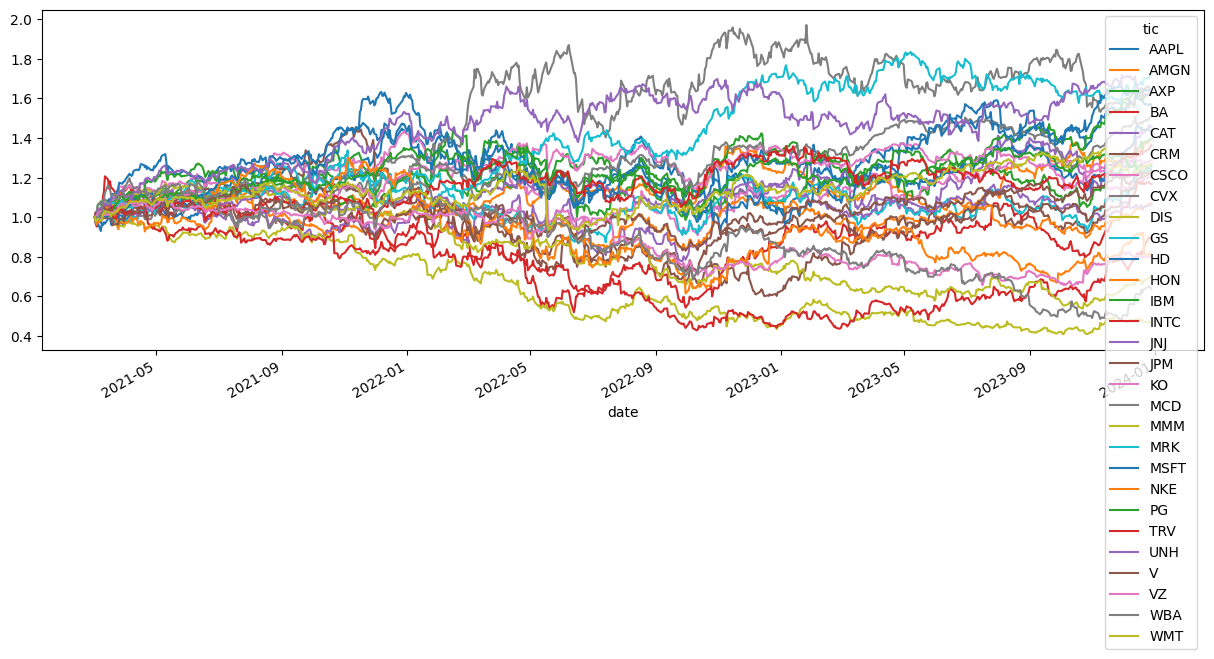

In [12]:
df = pd.DataFrame(df)

print(df.dtypes)
print(df)

# Pivot the DataFrame
pivot_df = df.pivot(index='date', columns='tic', values='close')

print(pivot_df)

pivot_df.index = pd.to_datetime(pivot_df.index)

(pivot_df / pivot_df.iloc[0,:]).plot()


Final Portfolio:
Shares: AAPL       0.0
AMGN      85.0
AXP        0.0
BA       514.0
CAT      184.0
CRM      106.0
CSCO    1787.0
CVX      205.0
DIS      207.0
GS       182.0
HD       169.0
HON      289.0
IBM      309.0
INTC    4231.0
JNJ        0.0
JPM      217.0
KO       357.0
MCD      104.0
MMM      136.0
MRK        0.0
MSFT       0.0
NKE      700.0
PG         0.0
TRV       34.0
UNH        0.0
V         67.0
VZ         0.0
WBA     6492.0
WMT        0.0
dtype: float64
Total of each: AAPL              0.0
AMGN     23953.696747
AXP               0.0
BA      133979.241882
CAT      53544.488525
CRM      27769.560913
CSCO     87433.254627
CVX      29613.919754
DIS      18604.199226
GS       68889.188354
HD       57467.772308
HON      59631.160904
IBM      49158.172348
INTC    209797.956303
JNJ               0.0
JPM      36050.830246
KO       20569.353642
MCD      30288.540039
MMM      12078.480286
MRK               0.0
MSFT              0.0
NKE      75098.674774
PG                0.0
TRV

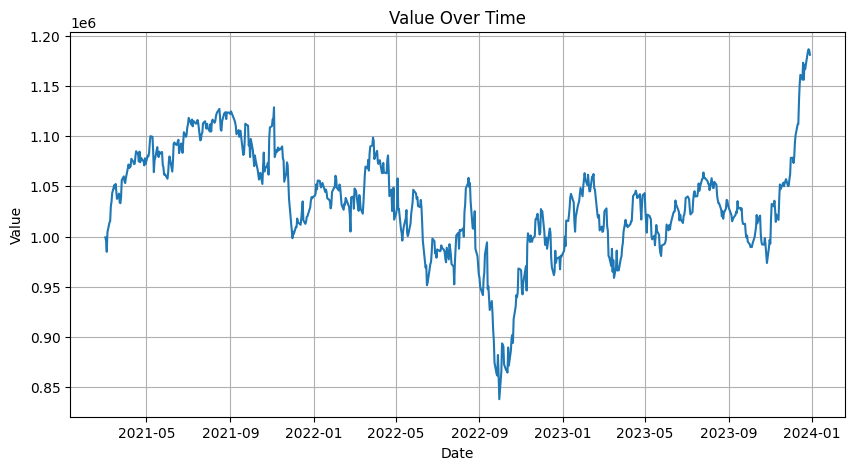

In [13]:
import numpy as np
import pandas as pd

transaction_fees=[]

def calculate_sma(prices, window):
    return prices.rolling(window=window).mean()

def rebalance_portfolio_olmar(cash, shares, prices, window=10, eps=10):
    # Calculate Moving Averages
    sma = calculate_sma(prices, window)
    
    # Calculate price deviation
    deviation = prices.iloc[-1] / sma.iloc[-1] - 1
    
    # Update target weights based on OLMAR algorithm
    excess_return = eps - deviation.mean()
    weights = np.maximum(0, deviation * excess_return)
    weights = weights / weights.sum()  # Normalize the weights

    if(weights.isnull().values.any()):
        # Default to uniform weights if no weights are calculated yet
        weights = (np.ones(len(prices.iloc[-1]))) / (len(prices.iloc[-1]))

    remaining_cash = cash
    
    # Available amount for purchases of each stock, must factor in the transaction cost
    current_wealth = (np.sum(prices.iloc[-1] * shares) + cash) / (1 + transaction_cost)

    target_values = weights * current_wealth
    target_shares = target_values // (prices.iloc[-1])
    
    shares_to_change = target_shares - shares

    sell_shares = np.where(shares_to_change < 0, -shares_to_change, 0)
    buy_shares = np.where(shares_to_change > 0, shares_to_change, 0)
    sale_amount = (np.sum(sell_shares * prices.iloc[-1]) + np.sum(buy_shares * prices.iloc[-1]))
    transaction_fee = (np.sum(sell_shares * prices.iloc[-1]) + np.sum(buy_shares * prices.iloc[-1])) * transaction_cost

    # Test a shrinkage factor
    pending_transaction = cash + np.sum(sell_shares * prices.iloc[-1]) - np.sum(buy_shares * prices.iloc[-1]) - transaction_fee

    # We are about to go negative on cash, need to use the shrink factor
    if (pending_transaction < 0):
        shrink_factor = (np.sum(prices.iloc[-1] * shares) + cash) / ((1 + transaction_cost) * sale_amount )
        shares_to_change = np.floor(shares_to_change * shrink_factor)

    # Readjusted to the shrink factor if needed
    sell_shares = np.where(shares_to_change < 0, -shares_to_change, 0)
    buy_shares = np.where(shares_to_change > 0, shares_to_change, 0)
    sale_amount = (np.sum(sell_shares * prices.iloc[-1]) + np.sum(buy_shares * prices.iloc[-1]))
    transaction_fee = (np.sum(sell_shares * prices.iloc[-1]) + np.sum(buy_shares * prices.iloc[-1])) * transaction_cost
    
    cash += np.sum(sell_shares * prices.iloc[-1])
    cash -= np.sum(buy_shares * prices.iloc[-1])

    shares = shares + shares_to_change
    remaining_cash = cash - transaction_fee

    transaction_fees.append(transaction_fee)

    assert remaining_cash >= 0, "Cash went negative"
    
    return shares, remaining_cash, weights


transaction_cost = 0.001

new_column_names = ['Date'] + [f'{col}' for col in pivot_df.columns]

# Convert to the desired format
X = pivot_df.reset_index()
X.columns = new_column_names

# Initialize to uniform shares
initial_cash = 1000000
initial_shares = np.ones(len(X.columns) - 1) / (len(X.columns) - 1)
net_worth = []

portfolio_shares = initial_shares
portfolio_cash = initial_cash

rebalance_iter = 50
rebalance_i = rebalance_iter

# Rebalance at each step
for idx, row in X.iterrows():
    price_per_share = row[1:].values
    
    # Reset the index as needed
    if (rebalance_i % rebalance_iter == 0):
        portfolio_shares, portfolio_cash, target_weights = rebalance_portfolio_olmar(
        portfolio_cash, 
        portfolio_shares, 
        X.set_index('Date').iloc[:idx+1], 
        window=5, 
        eps=10)

        rebalance_i = 0
    rebalance_i += 1
    
    asset_wealth = np.sum(portfolio_shares * price_per_share)
    net_worth.append(asset_wealth + portfolio_cash)

print("\nFinal Portfolio:")
print(f"Shares: {portfolio_shares}")
print(f"Total of each: {portfolio_shares * price_per_share}")
print(f"Cash: {portfolio_cash:.2f}")
print(f"Transaction fees: {np.sum(np.array(transaction_fees))}")
print(f"Final Net Worth: {net_worth[-1]}")


# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(X['Date'], net_worth)
plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Write this out to a csv file, with date and net worth
df = pd.DataFrame(net_worth, columns=['OLMAR_net_worth'])
if len(df) == len(X):
    df['Date'] = X['Date']
    df.set_index('Date', inplace=True)
else:
    raise ValueError("DataFrames do not have the same number of rows.")
df.to_csv('OLMAR_net_worth.csv')

                0
0    9.991502e+05
1    9.958637e+05
2    9.847946e+05
3    1.004114e+06
4    1.014030e+06
..            ...
709  1.166540e+06
710  1.184083e+06
711  1.186448e+06
712  1.185233e+06
713  1.180946e+06

[714 rows x 1 columns]
          Date  OLMAR Net Worth
0   2021-03-02     9.991502e+05
1   2021-03-03     9.958637e+05
2   2021-03-04     9.847946e+05
3   2021-03-05     1.004114e+06
4   2021-03-08     1.014030e+06
..         ...              ...
709 2023-12-22     1.166540e+06
710 2023-12-26     1.184083e+06
711 2023-12-27     1.186448e+06
712 2023-12-28     1.185233e+06
713 2023-12-29     1.180946e+06

[714 rows x 2 columns]
            ensemble       dji
date                          
2021-04-06  1.000000  1.000000
2021-04-07  1.000000  1.000479
2021-04-08  1.000008  1.002194
2021-04-09  1.000040  1.011079
2021-04-12  1.000025  1.009427
...              ...       ...
2022-03-28  1.000058  1.045637
2022-03-29  1.000384  1.055757
2022-03-30  1.000283  1.053801
2022-03-31 

<Figure size 1500x500 with 0 Axes>

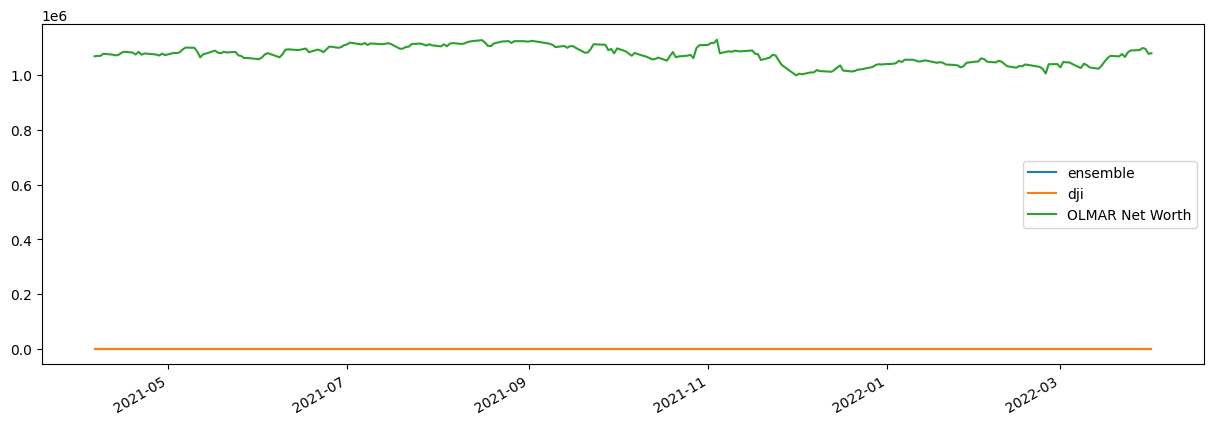

In [14]:
result = pd.DataFrame()

df = pd.DataFrame(net_worth)

print(df)

# Combine the DataFrames side-by-side
combined_df = pd.concat([X.Date, df], axis=1)

combined_df.columns = ["Date", "OLMAR Net Worth"]
print(combined_df)

combined_df.set_index('Date', inplace=True)

# TODO Change result period to use saved file
result = pd.read_csv(ensemble_results_file)

result.set_index('date', inplace=True)

result.index = pd.to_datetime(result.index)

print(result)

# Join DataFrames on date index
merged_df = result.join(combined_df, how='inner')
print(merged_df)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
merged_df.plot();

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (713, 8)
Annual return          0.066963
Cumulative returns     0.201283
Annual volatility      0.150850
Sharpe ratio           0.505723
Calmar ratio           0.305201
Stability              0.003747
Max drawdown          -0.219408
Omega ratio            1.089357
Sortino ratio          0.720819
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.009951
Daily value at risk   -0.018703
dtype: float64
Baseline Sharpe: -1.1648074324287965
==============Get Backtest Stats===========
Annual return          0.060775
Cumulative returns     0.181951
Annual volatility      0.164085
Sharpe ratio           0.442119
Calmar ratio           0.236035
Stability              0.116168
Max drawdown          -0.257483
Omega ratio            1.078482
Sortino ratio          0.627630
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.892233
Daily value at risk   -0.02038


C:\Users\bencj\AppData\Local\Temp\ipykernel_20936\1934935889.py:25: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  sharpe = timeseries.sharpe_ratio(daily_ret, risk_free= 0.001)
C:\Users\bencj\AppData\Local\Temp\ipykernel_20936\1934935889.py:40: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  sharpe = timeseries.sharpe_ratio(daily_ret, risk_free= 0.001)


<Figure size 1500x500 with 0 Axes>

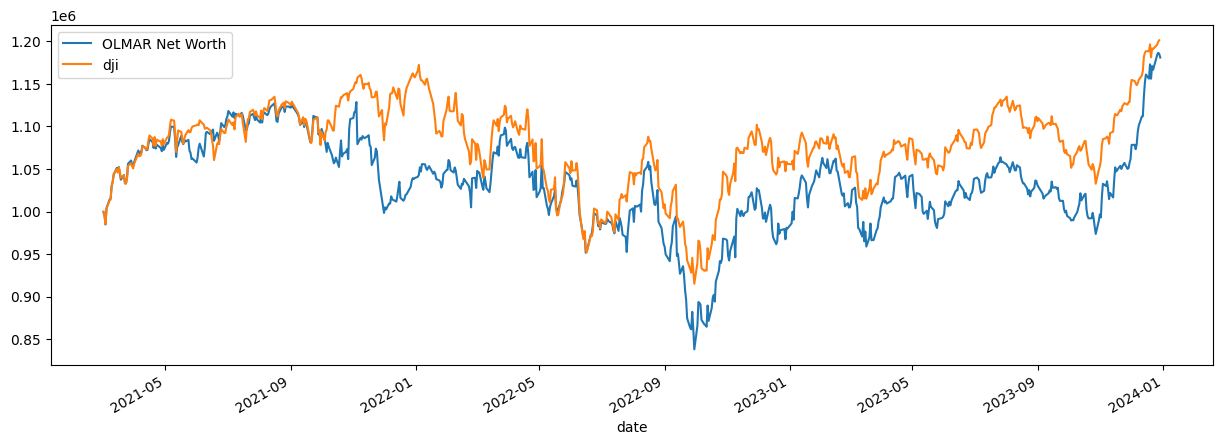

In [15]:
from finrl.plot import backtest_stats,  get_baseline, get_daily_return
from pyfolio import timeseries

first_date = combined_df.index.min()
last_date = combined_df.index.max()


print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = first_date,
        end = last_date)

stats = backtest_stats(df_dji_, value_col_name = 'close')


df_dji = pd.DataFrame()
df_dji['date'] = combined_df.index
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * initial_cash
df_dji = df_dji.set_index(df_dji.columns[0])


daily_ret = get_daily_return(df_dji_, value_col_name = 'close')
# TODO use the correct rf rate
sharpe = timeseries.sharpe_ratio(daily_ret, risk_free= 0.001)
print("Baseline Sharpe:", sharpe)


combined_df = pd.DataFrame({'date': combined_df.index, 'OLMAR Net Worth': combined_df['OLMAR Net Worth']})
combined_df = combined_df.set_index('date')


print("==============Get Backtest Stats===========")
backtest_df = pd.DataFrame({'date': combined_df.index, 'OLMAR Net Worth': combined_df['OLMAR Net Worth']})
stats = backtest_stats(account_value=backtest_df, value_col_name="OLMAR Net Worth")


daily_ret = get_daily_return(backtest_df, value_col_name="OLMAR Net Worth")
# TODO use the correct rf rate
sharpe = timeseries.sharpe_ratio(daily_ret, risk_free= 0.001)
print("Backtest Sharpe:", sharpe)

print("==============Compare to DJIA===========")
result = pd.DataFrame()

result = pd.merge(combined_df, df_dji, left_index=True, right_index=True)
# print("result: ", result)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();